<a href="https://colab.research.google.com/github/jorferr89/10-ejemplos-opencv-python/blob/main/YOLO_COCO_DeteccionPelotas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Objetos - Pelotas de tenis - YOLO y COCO

## Librerías necesarias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Cargar nombres de clases

In [ ]:
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

## Descarga del archivo `yolov3.weights`

El archivo es bastante grande, por eso se descarga para esta prueba. Debe descargar también el archivo `yolov3.cfg`

In [ ]:
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights

--2024-03-18 01:20:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.5MB/s    in 5.9s    

2024-03-18 01:24:04 (39.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Carga del modelo YOLOv3 utilizando los archivos de configuración y pesos especificados

In [ ]:
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)

## YOLO - parámetros

In [ ]:
# Umbral de objetividad para filtrar detecciones basadas en la probabilidad de que un cuadro contenga un objeto
objectnessThreshold = 0.5

# Umbral de confianza para filtrar detecciones basadas en la probabilidad de que un cuadro contenga un objeto de una clase específica
confThreshold = 0.5

# Umbral de supresión no máxima para eliminar cuadros delimitadores superpuestos
nmsThreshold = 0.4

# Ancho de la imagen de entrada de la red neuronal
inpWidth = 416

# Alto de la imagen de entrada de la red neuronal
inpHeight = 416

## Carga y muestra de la imagen

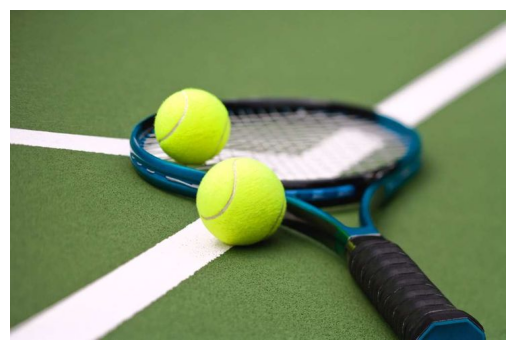

In [ ]:
# Ruta de la imagen
image_tennis_ball_example = "imagen-pelota-tenis.jpg"

# Cargar la imagen con OpenCV
image_tennis_ball = cv2.imread(image_tennis_ball_example)

# Mostrar la imagen usando Matplotlib
plt.imshow(cv2.cvtColor(image_tennis_ball, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Creación un blob (objeto binario grande) a partir de una imagen

In [ ]:
blob = cv2.dnn.blobFromImage(image_tennis_ball, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

In [ ]:
# Establece la entrada de la red neuronal con el blob creado a partir de la imagen. Esto prepara la red para realizar una inferencia en la imagen.
net.setInput(blob)

# Realiza un pase hacia adelante (forward pass) en la red neuronal para obtener las salidas de las capas de salida no conectadas. Estas salidas contienen las detecciones de objetos y sus confianzas.
outs = net.forward(net.getUnconnectedOutLayersNames())

# Obtiene la altura y el ancho de la imagen para su posterior uso en el cálculo de las coordenadas de los cuadros delimitadores.
frameHeight = image_tennis_ball.shape[0]
frameWidth = image_tennis_ball.shape[1]

classIds = []
confidences = []
boxes = []

# Obtiene el índice de la clase "pelota de tenis" en la lista de clases. Esto se utiliza más adelante para identificar las detecciones de pelotas de tenis en las salidas de la red.
sportsBallClassId = classes.index("sports ball")

##  Procesamiento de las salidas de una red neuronal para detectar objetos en una imagen.

Para cada detección potencial, se extraen los puntajes de confianza de las clases y se determina si la detección corresponde a la clase de "pelota de tenis" con una confianza suficientemente alta. Si la detección cumple con estos criterios, se calculan las coordenadas del cuadro delimitador y se almacenan junto con la clase y la confianza. Finalmente, se utiliza la supresión de no máximos para eliminar cuadros delimitadores redundantes y se conservan los índices de los cuadros delimitadores finales.

In [ ]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        classId = np.argmax(scores)
        confidence = scores[classId]
        if confidence > confThreshold and classId == sportsBallClassId:
            center_x = int(detection[0] * frameWidth)
            center_y = int(detection[1] * frameHeight)
            width = int(detection[2] * frameWidth)
            height = int(detection[3] * frameHeight)
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            classIds.append(classId)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])

indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

## Dibujar cuadros delimitadores alrededor de las detecciones finales de objetos en la imagen

In [ ]:
for i in indices:
    box = boxes[i]
    left = box[0]
    top = box[1]
    width = box[2]
    height = box[3]
    cv2.rectangle(image_tennis_ball, (left, top), (left + width, top + height), (255, 178, 50), 3)

## Muestra de la imagen con la detección

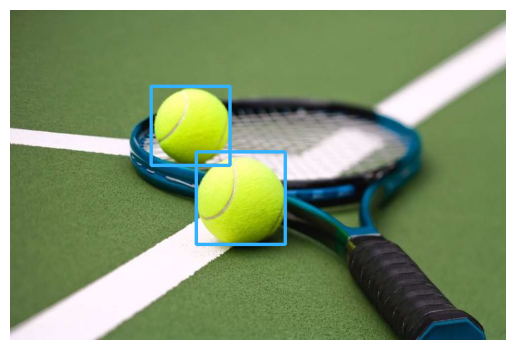

In [ ]:
plt.imshow(cv2.cvtColor(image_tennis_ball, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()